<a href="https://colab.research.google.com/github/JuanMSarmientoU/Telecom-X-Final/blob/main/TelcomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparacion de datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE

In [ ]:
# 1.1 Carga del archivo CSV limpio

# Cargamos el archivo limpio (asegúrate de tenerlo en tu Colab en la ruta correcta)
df = pd.read_csv('/telecomX_clean.csv')

# Mostramos las primeras 5 filas para tener una idea de la estructura del dataset
df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.16
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.97
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.43
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.22
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.76


In [ ]:
# Verificamos el número de filas y columnas
print("Dimensiones del DataFrame (filas, columnas):", df.shape)

Dimensiones del DataFrame (filas, columnas): (7267, 22)


In [ ]:
# Obtenemos un resumen de las columnas, tipos de datos y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


In [ ]:
# Revisamos si hay valores nulos en el dataset
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
Cuentas_Diarias     0
dtype: int64


In [ ]:
# Revisión rápida de estadísticas descriptivas para columnas numéricas
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.126155
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,0.989744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.600000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.160000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.310000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.950000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.900000


In [ ]:
# 1.2 Eliminación de columnas irrelevantes

# Eliminamos columnas que no son útiles para el análisis predictivo
columnas_a_eliminar = ['customerID', 'Cuentas_Diarias']
df = df.drop(columns=columnas_a_eliminar)

# Verificamos nuevamente las columnas restantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  


In [ ]:
# 1.3 Encoding: Convertimos variables categóricas a variables dummy (one-hot encoding)

# Identificamos las columnas categóricas (tipo object)
columnas_categoricas = df.select_dtypes(include='object').columns
print("Columnas categóricas detectadas:", list(columnas_categoricas))

# Aplicamos One-Hot Encoding usando get_dummies
# drop_first=True elimina la primera categoría para evitar multicolinealidad
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Verificamos cómo quedó el DataFrame codificado
df_encoded.head()


Columnas categóricas detectadas: ['gender', 'InternetService', 'Contract', 'PaymentMethod']


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Charges.Monthly,Charges.Total,gender_Male,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,65.6,593.30,False,True,False,True,False,False,False,True
1,0,0,0,0,9,1,1,0,0,0,...,59.9,542.40,True,True,False,False,False,False,False,True
2,1,0,0,0,4,1,0,0,0,1,...,73.9,280.85,True,False,True,False,False,False,True,False
3,1,1,1,0,13,1,0,0,1,1,...,98.0,1237.85,True,False,True,False,False,False,True,False
4,1,1,1,0,3,1,0,0,0,0,...,83.9,267.40,False,False,True,False,False,False,False,True


In [ ]:
# 1.4 Verificación de la proporción de cancelación

# Contamos la cantidad de clientes que cancelaron y los que no
print("Distribución absoluta de la variable Churn:")
print(df_encoded['Churn'].value_counts())

# Calculamos la proporción (porcentaje) de cada clase
print("\nDistribución porcentual de la variable Churn:")
print(df_encoded['Churn'].value_counts(normalize=True).round(3) * 100)

Distribución absoluta de la variable Churn:
Churn
0    5398
1    1869
Name: count, dtype: int64

Distribución porcentual de la variable Churn:
Churn
0    74.3
1    25.7
Name: proportion, dtype: float64


In [ ]:
# 1.5 Balanceo de clases usando SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar X (features) e y (target)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Dividimos el dataset antes de balancear para tener una evaluación real
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Aplicamos SMOTE al set de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Verificamos el nuevo balance
print("Distribución después de SMOTE:")
print(y_train_bal.value_counts())

Distribución después de SMOTE:
Churn
0    4048
1    4048
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import RobustScaler

# Creamos una copia para no afectar el set original balanceado
X_train_scaled = X_train_bal.copy()
X_test_scaled = X_test.copy()

# Definimos las columnas numéricas
columnas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']

# Inicializamos el escalador
scaler = RobustScaler()

# Ajustamos y transformamos en entrenamiento
X_train_scaled[columnas_numericas] = scaler.fit_transform(X_train_bal[columnas_numericas])

# Usamos el mismo escalador en el test para mantener coherencia
X_test_scaled[columnas_numericas] = scaler.transform(X_test[columnas_numericas])


#Correlación y Selección de Variables

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


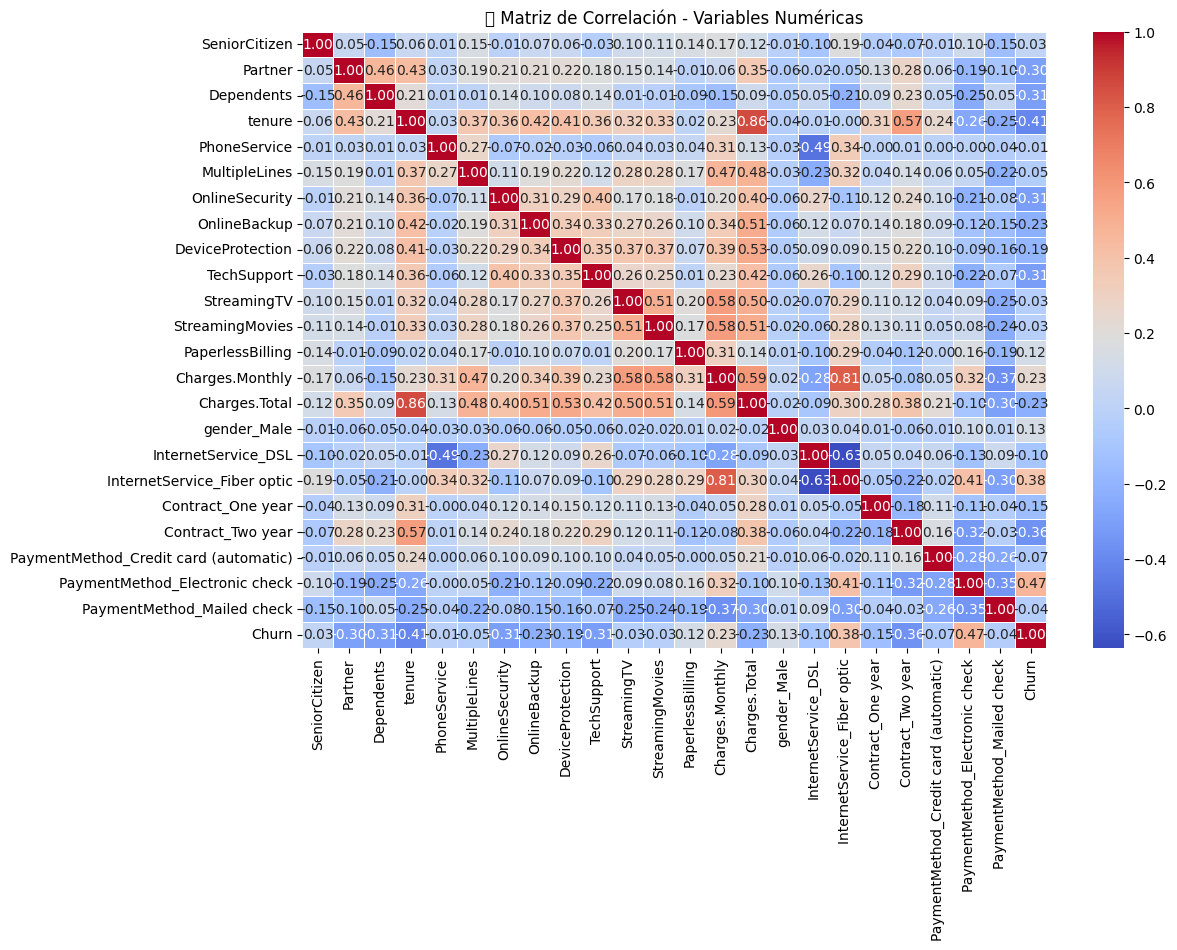

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agregamos la variable objetivo al DataFrame escalado de entrenamiento
X_train_scaled['Churn'] = y_train_bal.values

# Calculamos la matriz de correlación solo con variables numéricas
corr_matrix = X_train_scaled.corr()

# Visualizamos la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('🔍 Matriz de Correlación - Variables Numéricas')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


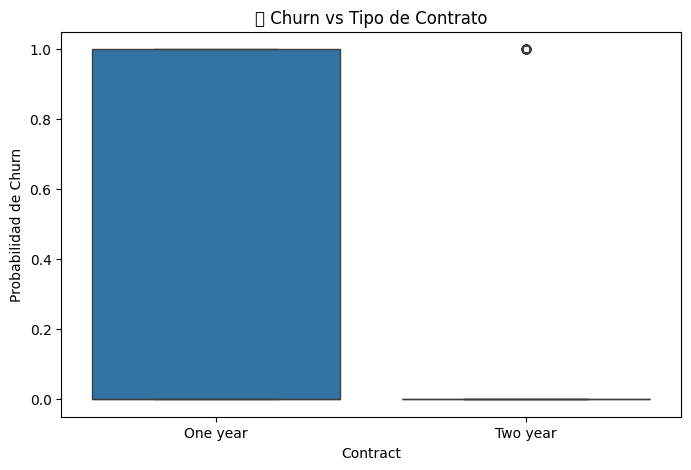

In [ ]:
# Necesitamos la columna 'Contract' original, así que usamos el df original (sin encoding)
# Unimos X_train con y_train para análisis
df_analysis = X_train.copy()
df_analysis['Churn'] = y_train.values
df_analysis['Contract'] = X_train[['Contract_One year', 'Contract_Two year']].idxmax(axis=1)
df_analysis['Contract'] = df_analysis['Contract'].map({
    'Contract_One year': 'One year',
    'Contract_Two year': 'Two year'
}).fillna('Month-to-month')

# Boxplot: Cancelación vs Tipo de Contrato
plt.figure(figsize=(8, 5))
sns.boxplot(x='Contract', y='Churn', data=df_analysis)
plt.title('📦 Churn vs Tipo de Contrato')
plt.ylabel('Probabilidad de Churn')
plt.show()


/tmp/ipython-input-1561221091.py:12: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


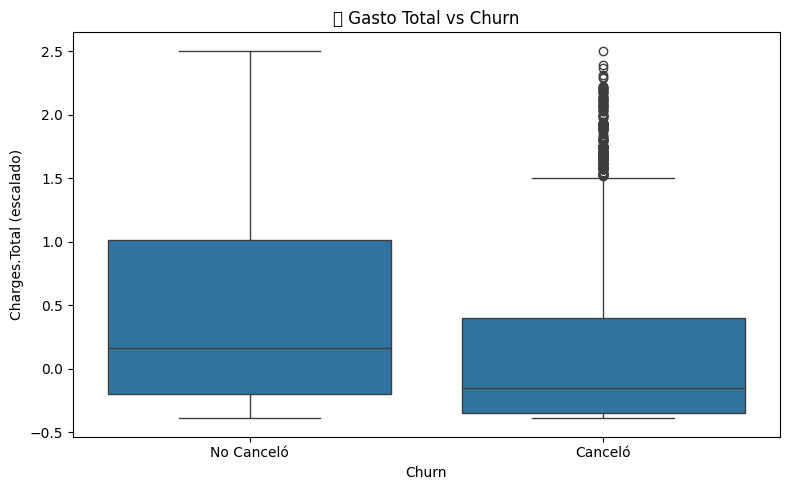

In [ ]:
# Crear una copia temporal con la columna Churn añadida
df_temp = X_train_scaled.copy()
df_temp['Churn'] = y_train_bal.values

# Ahora sí, graficamos
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Charges.Total', data=df_temp)
plt.title('💸 Gasto Total vs Churn')
plt.xticks([0, 1], ['No Canceló', 'Canceló'])
plt.xlabel('Churn')
plt.ylabel('Charges.Total (escalado)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1234734485.py:7: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


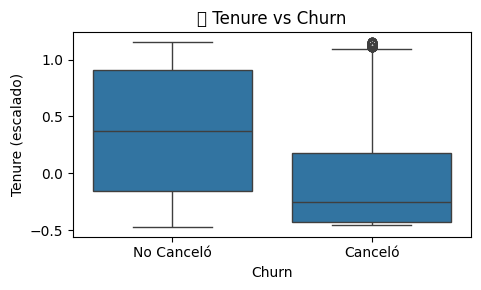

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Churn', y='tenure', data=df_temp)
plt.title('⏳ Tenure vs Churn')
plt.xticks([0, 1], ['No Canceló', 'Canceló'])
plt.xlabel('Churn')
plt.ylabel('Tenure (escalado)')
plt.tight_layout()
plt.show()


/tmp/ipython-input-500314850.py:7: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


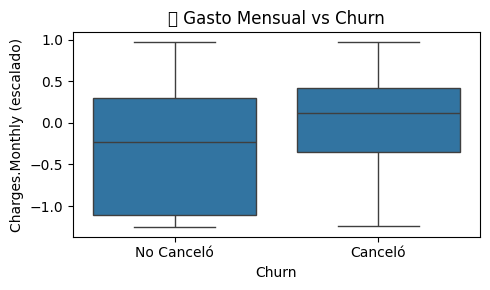

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_temp)
plt.title('💰 Gasto Mensual vs Churn')
plt.xticks([0, 1], ['No Canceló', 'Canceló'])
plt.xlabel('Churn')
plt.ylabel('Charges.Monthly (escalado)')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3763968332.py:7: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


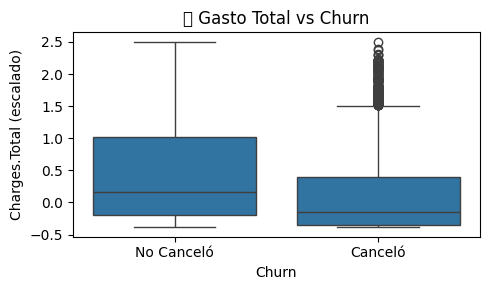

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Churn', y='Charges.Total', data=df_temp)
plt.title('💸 Gasto Total vs Churn')
plt.xticks([0, 1], ['No Canceló', 'Canceló'])
plt.xlabel('Churn')
plt.ylabel('Charges.Total (escalado)')
plt.tight_layout()
plt.show()


#Modelado Predictivo

In [ ]:
# División del dataset (25% test, 75% entrenamiento)

X = df_encoded.drop(columns='Churn')
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Visualizamos proporciones
print("Distribución en entrenamiento:")
print(y_train.value_counts(normalize=True).round(3) * 100)

print("\nDistribución en prueba:")
print(y_test.value_counts(normalize=True).round(3) * 100)

Distribución en entrenamiento:
Churn
0    74.3
1    25.7
Name: proportion, dtype: float64

Distribución en prueba:
Churn
0    74.3
1    25.7
Name: proportion, dtype: float64


In [ ]:
# Aplicamos SMOTE al set de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Visualizamos nueva proporción balanceada
print("\nDistribución después de SMOTE (entrenamiento):")
print(y_train_bal.value_counts())


Distribución después de SMOTE (entrenamiento):
Churn
0    4048
1    4048
Name: count, dtype: int64


In [ ]:
columnas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']

X_train_scaled = X_train_bal.copy()
X_test_scaled = X_test.copy()

scaler = RobustScaler()
X_train_scaled[columnas_numericas] = scaler.fit_transform(X_train_scaled[columnas_numericas])
X_test_scaled[columnas_numericas] = scaler.transform(X_test_scaled[columnas_numericas])

In [ ]:
model_log = LogisticRegression(random_state=42, max_iter=1000)
model_log.fit(X_train_scaled, y_train_bal)

# Predicción
y_pred_log = model_log.predict(X_test_scaled)

In [ ]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_bal, y_train_bal)

# Predicción
y_pred_rf = model_rf.predict(X_test)

In [ ]:
def evaluar_modelo(nombre, y_true, y_pred):
    print(f"\n📊 Evaluación del modelo: {nombre}")
    print("Accuracy     :", round(accuracy_score(y_true, y_pred), 3))
    print("Precisión    :", round(precision_score(y_true, y_pred), 3))
    print("Recall       :", round(recall_score(y_true, y_pred), 3))
    print("F1-score     :", round(f1_score(y_true, y_pred), 3))

    # Visualización
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])

    fig, ax = plt.subplots(figsize=(6, 6))  # Tamaño más amplio
    disp.plot(ax=ax, cmap='Purples', colorbar=False)

    # Estética
    ax.set_title(f'Matriz de Confusión - {nombre}', fontsize=14, weight='bold')
    ax.set_xlabel("Predicción", fontsize=12)
    ax.set_ylabel("Valor real", fontsize=12)
    plt.tight_layout()
    plt.show()


📊 Evaluación del modelo: Regresión Logística
Accuracy     : 0.762
Precisión    : 0.531
Recall       : 0.645
F1-score     : 0.582


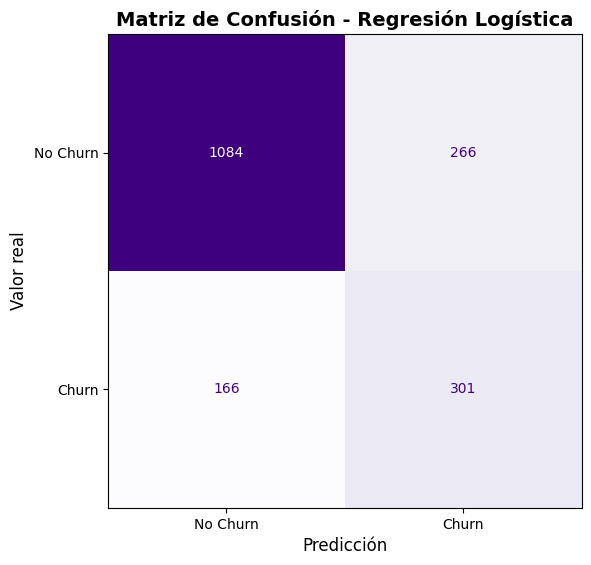


📊 Evaluación del modelo: Random Forest (umbral 0.5)
Accuracy     : 0.769
Precisión    : 0.55
Recall       : 0.565
F1-score     : 0.558


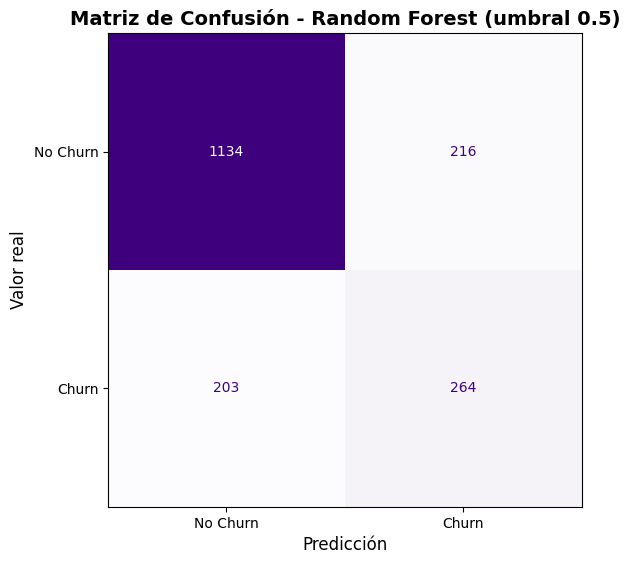

In [ ]:
evaluar_modelo("Regresión Logística", y_test, y_pred_log)
evaluar_modelo("Random Forest (umbral 0.5)", y_test, y_pred_rf)


📊 Evaluación del modelo: Random Forest (umbral 0.4)
Accuracy     : 0.748
Precisión    : 0.507
Recall       : 0.679
F1-score     : 0.581


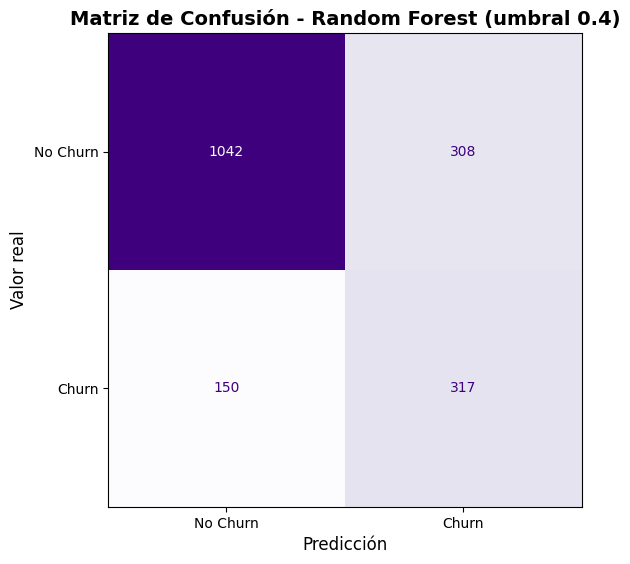

In [ ]:
y_proba_rf = model_rf.predict_proba(X_test)[:, 1]
y_pred_rf_ajustado = np.where(y_proba_rf >= 0.4, 1, 0)

evaluar_modelo("Random Forest (umbral 0.4)", y_test, y_pred_rf_ajustado)

In [ ]:
from sklearn.metrics import recall_score, f1_score

# En entrenamiento
recall_train_rf = recall_score(y_train_bal, model_rf.predict(X_train_bal))
recall_test_rf = recall_score(y_test, y_pred_rf)

print("\nComparación de Recall Random Forest:")
print("Entrenamiento:", round(recall_train_rf, 3))
print("Prueba       :", round(recall_test_rf, 3))



Comparación de Recall Random Forest:
Entrenamiento: 0.994
Prueba       : 0.565


El modelo Champion es **Random Forest con umbral ajustado a 0.4**, ya que mejora significativamente el recall (0.679) y mantiene un F1-score aceptable (0.581), lo cual es ideal para reducir la pérdida de clientes en campañas de retención.


In [ ]:
import joblib
# Guarda el modelo Random Forest
joblib.dump(model_rf, 'modelo_champion_rf.pkl')


['modelo_champion_rf.pkl']

In [ ]:
# Guardamos el umbral como variable independiente
umbral = 0.4
joblib.dump(umbral, 'umbral_champion.pkl')

['umbral_champion.pkl']

In [ ]:
# Para asegurar el orden de las columnas en producción
joblib.dump(X_train.columns.tolist(), 'columnas_modelo.pkl')

['columnas_modelo.pkl']

#Análisis de Importancia de Variables según el Modelo

/tmp/ipython-input-3983642770.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=importancia_rf.head(15), palette='viridis')
/tmp/ipython-input-3983642770.py:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


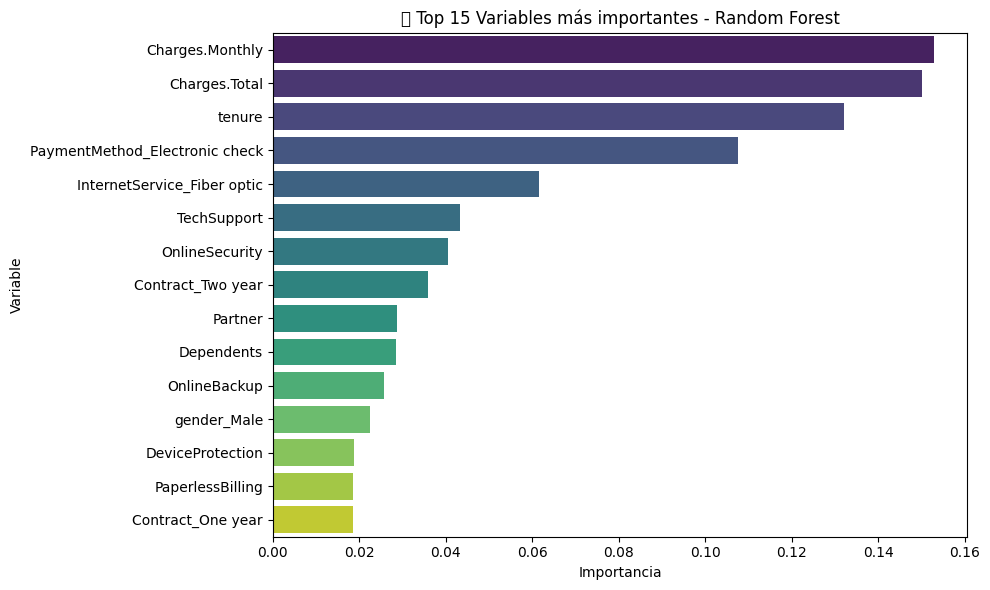

In [ ]:
# Importancia de variables en Random Forest
importances = model_rf.feature_importances_
features = X_train.columns

# Convertimos a DataFrame para ordenarlo
importancia_rf = pd.DataFrame({
    'Variable': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=importancia_rf.head(15), palette='viridis')
plt.title('🔍 Top 15 Variables más importantes - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

/tmp/ipython-input-622270438.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=importancia_log.head(15), palette='coolwarm')
/tmp/ipython-input-622270438.py:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


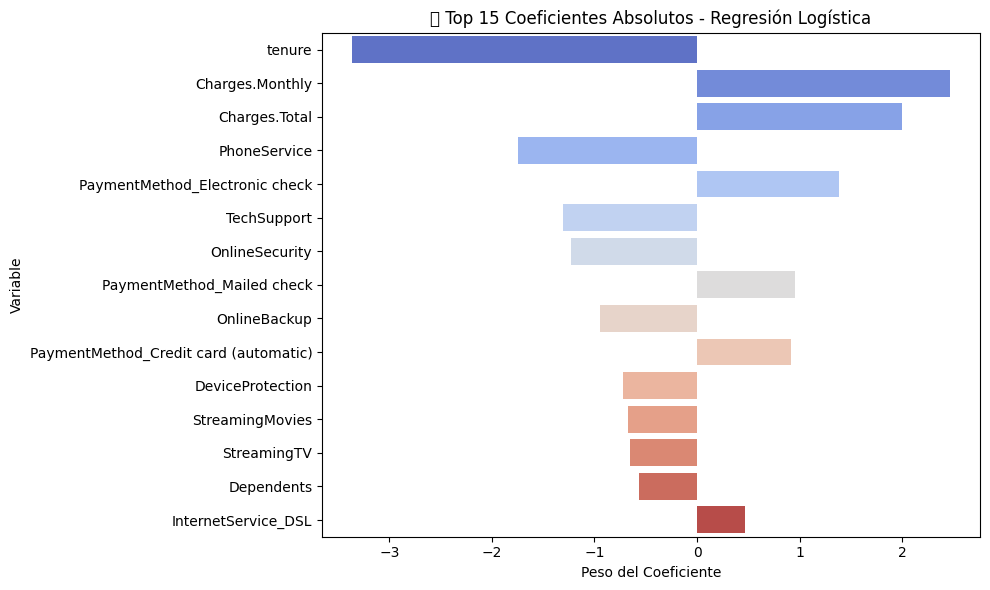

In [ ]:
# Coeficientes del modelo
coeficientes = model_log.coef_[0]
variables = X_train_scaled.columns

# Creamos DataFrame
importancia_log = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coeficientes
}).sort_values(by='Coeficiente', key=abs, ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Variable', data=importancia_log.head(15), palette='coolwarm')
plt.title('🔍 Top 15 Coeficientes Absolutos - Regresión Logística')
plt.xlabel('Peso del Coeficiente')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()
